In [1]:
import torch, torchvision
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np

# Part 1

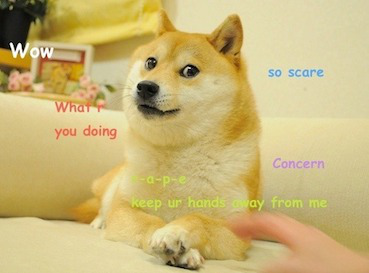

In [2]:
img = Image.open(urlopen("https://upload.wikimedia.org/wikipedia/en/5/5f/Original_Doge_meme.jpg"))
img

In [3]:
# load model
resnet = torchvision.models.resnet101(pretrained=True)

# set network to evaluation mode
resnet.eval()

transform = torchvision.transforms.Compose([          
 torchvision.transforms.CenterCrop(224),               
 torchvision.transforms.ToTensor(),                     
 torchvision.transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                            
 std=[0.229, 0.224, 0.225]                             
 )])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


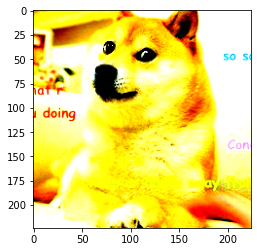

In [4]:
img_t = transform(img)
print(img_t.shape)
plt.imshow(torch.einsum("chw -> hwc", img_t))

In [5]:
batch_t = torch.unsqueeze(img_t, 0)

# perform inference
out = resnet(batch_t)

# lookup the labels

# print top-5 classes predicted by model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
for idx in indices[0][:5]:
    print('Label:', idx, '. Confidence Score: {:.3f} %'.format(percentage[idx].item()))

Label: tensor(273) . Confidence Score: 61.349 %
Label: tensor(207) . Confidence Score: 5.080 %
Label: tensor(248) . Confidence Score: 3.934 %
Label: tensor(151) . Confidence Score: 3.333 %
Label: tensor(260) . Confidence Score: 3.098 %


#### Task

Modify the code above, to perform data augmentation for the testing sample (averaging the scores of 5 crops: center crop, upper left crop, lower left crop, lower right crop, upper right crop).

Please discuss the advantages and disadvantages of using testing data augmentation.

In [6]:
# https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.FiveCrop

In [7]:
transform_after_crop = torchvision.transforms.Compose([
 torchvision.transforms.ToTensor(),                     
 torchvision.transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                            
 std=[0.229, 0.224, 0.225]
 )])

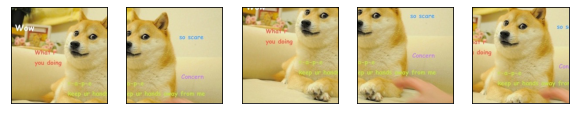

In [8]:
npimg = np.array(img)

crops = [npimg[:224,:224,:], npimg[:224,-224:,:], # top left, top right
         npimg[-224:,:224,:], npimg[-224:,-224:,:], # bottom left, bottom right
         npimg[npimg.shape[0]//2 - 112:npimg.shape[0]//2 + 112,
               npimg.shape[1]//2 - 112:npimg.shape[1]//2 + 112,:]]  # center plot

fig, ax = plt.subplots(1,5,figsize=(10,3))
for i,crop in enumerate(crops):
    ax[i].imshow(crop)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


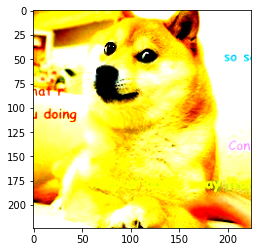

In [9]:
batch_t = torch.stack([transform_after_crop(crop) for crop in crops])
plt.imshow(torch.einsum("chw -> hwc", batch_t[-1]))

In [10]:
# perform inference
out_arr = resnet(batch_t)

# lookup the labels

# print top-5 classes predicted by model
for out in out_arr:
    out = torch.stack([out])
    _, indices = torch.sort(out, descending=True)
    print()
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    for idx in indices[0][:5]:
        print('Label:', idx, '. Confidence Score: {:.3f} %'.format(percentage[idx].item()))


Label: tensor(263) . Confidence Score: 18.489 %
Label: tensor(151) . Confidence Score: 17.872 %
Label: tensor(273) . Confidence Score: 15.142 %
Label: tensor(207) . Confidence Score: 7.184 %
Label: tensor(259) . Confidence Score: 6.969 %

Label: tensor(273) . Confidence Score: 60.893 %
Label: tensor(263) . Confidence Score: 15.535 %
Label: tensor(248) . Confidence Score: 5.338 %
Label: tensor(250) . Confidence Score: 4.745 %
Label: tensor(151) . Confidence Score: 4.091 %

Label: tensor(260) . Confidence Score: 37.985 %
Label: tensor(207) . Confidence Score: 14.468 %
Label: tensor(273) . Confidence Score: 9.954 %
Label: tensor(248) . Confidence Score: 8.859 %
Label: tensor(208) . Confidence Score: 7.722 %

Label: tensor(273) . Confidence Score: 60.922 %
Label: tensor(260) . Confidence Score: 6.452 %
Label: tensor(151) . Confidence Score: 4.968 %
Label: tensor(235) . Confidence Score: 4.481 %
Label: tensor(248) . Confidence Score: 4.288 %

Label: tensor(273) . Confidence Score: 56.342 %

In [11]:
# indices

In [12]:
!jupyter nbconvert --to script homework.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook homework.ipynb to script
[NbConvertApp] Writing 3137 bytes to homework.py
